In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585


In [5]:
variable = "epc100"
print(variable)

epc100


## Multimodel percentage change


### Multimodel median

In [185]:
files=glob.glob("Data/{}_*_percentage_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc',
 'Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc',
 'Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc',
 'Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc']

In [161]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                                     variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                            
Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc       epc100   None    18000        1      None  None       F32
Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32
Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32

In [162]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_whole_all.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 16 11:54:11 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

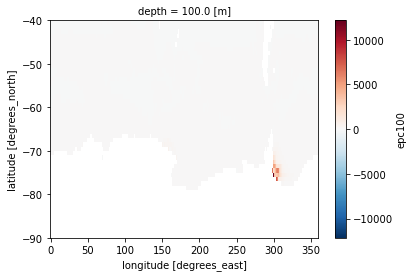

In [186]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole_all.nc".format(variable, model, experiment))
nc[variable].plot()
nc

In [187]:
a = {}
for i in range(len(files)):
    print(i)
    nc = xarray.open_dataset(files[i])
    values = nc[variable].values
    print(values)
    a[i] = values

0
[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ -2.7429626  -3.1978288  -3.430212  ...  -1.4791933  -1.8594587
   -2.2678359]
 [-11.606777  -12.013413  -12.175266  ...  -8.896867   -9.977976
  -10.912375 ]
 [-19.91915   -19.820457  -19.958336  ... -18.96144   -19.663546
  -19.955387 ]]
1
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [-15.890053 -15.787344 -17.229406 ... -16.256098 -16.349722 -16.106098]
 [-16.79515  -15.153548 -18.714766 ... -21.345068 -21.307276 -18.974121]
 [-17.937748 -23.275139 -26.863352 ... -20.010096 -17.081282 -17.10315 ]]
2
[[        nan         nan         nan ...         nan       

In [188]:
stacked = np.stack((a[0],a[1],a[2],a[3],a[4]))
stacked

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ -2.7429626,  -3.1978288,  -3.430212 , ...,  -1.4791933,
          -1.8594587,  -2.2678359],
        [-11.606777 , -12.013413 , -12.175266 , ...,  -8.896867 ,
          -9.977976 , -10.912375 ],
        [-19.91915  , -19.820457 , -19.958336 , ..., -18.96144  ,
         -19.663546 , -19.955387 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-15.890053 , -15.787344 , -17.229406 , ..., -

In [189]:
median = np.nanmedian(stacked, axis=[0])
median

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ -2.7429626,  -3.1978288,  -3.430212 , ...,  -1.4791933,
         -1.8594587,  -2.2678359],
       [ -9.734812 ,  -8.984246 ,  -8.229087 , ...,  -8.896867 ,
         -9.977976 , -10.378839 ],
       [ -4.646451 ,  -3.8748443,  -3.0438452, ...,  -6.84964  ,
         -6.201428 ,  -5.423118 ]], dtype=float32)

In [190]:
print(a[0].shape)
print(median.shape)

(50, 360)
(50, 360)


In [191]:
nc["median"] = (("lat","lon"), median)
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan ... 16.82 15.35 14.08 14.68
    median   (lat, lon) float32 nan nan nan nan ... -7.248 -6.85 -6.201 -5.423

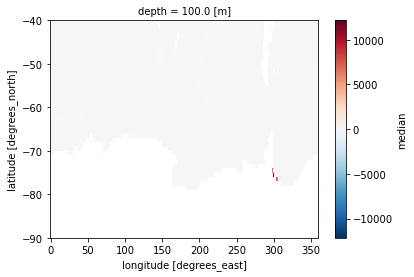

In [192]:
nc["median"].plot()

In [193]:
nc.to_netcdf(path = "Data/{}_{}_{}_percentage_whole_median.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Zonal mean


In [21]:
files=glob.glob("Data/Shape/{}_*_{}_inc.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_inc.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_inc.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_inc.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_inc.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_inc.nc']

In [22]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["inc"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [23]:
mean_inc = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [24]:
mean_inc[mean_inc < 0.8] = 0

In [25]:
sum(mean_inc[mean_inc < 0.8])

0.0

In [26]:
mean_inc.shape

(180, 360)

In [27]:
files=glob.glob("Data/Shape/{}_*_{}_dec.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_dec.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc']

In [28]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["dec"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [29]:
mean_dec = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [30]:
mean_dec[mean_dec < 0.8] = 0

In [31]:
sum(mean_dec[mean_dec < 0.8])

0.0

In [32]:
mean_dec.shape

(180, 360)

In [33]:
agree = mean_dec + mean_inc

In [34]:
agree[agree == 0] = np.nan

In [35]:
agree

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [36]:
mean_dec[mean_dec == 0] = np.nan
mean_inc[mean_inc == 0] = np.nan
mean_dec
mean_inc

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [51]:
files=glob.glob("Data/{}_*_percentage.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage.nc',
 'Data/epc100_MPI-ESM1-2-HR_ssp585_percentage.nc',
 'Data/epc100_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/epc100_ACCESS-ESM1-5_ssp585_percentage.nc']

In [52]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                               variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                      
Data/epc100_CMCC-ESM2_ssp585_percentage.nc       epc100   None    64800        1      None  None       F32
Data/epc100_MPI-ESM1-2-HR_ssp585_percentage.nc   epc100   None    64800        1      None  None       F32
Data/epc100_EC-Earth3-CC_ssp585_percentage.nc    epc100   None    64800        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage.nc    epc100   None    64800        1      None  None       F32
Data/epc100_ACCESS-ESM1-5_ssp585_percentage.nc   epc100   None    64800        1      None  None       F32

In [53]:
percentage.ensemble_mean()
percentage.cell_area()
percentage.to_nc("Data/Shape/{}_{}_{}_percentage.nc".format(variable, model, experiment),overwrite = True)

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 13:46:21 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

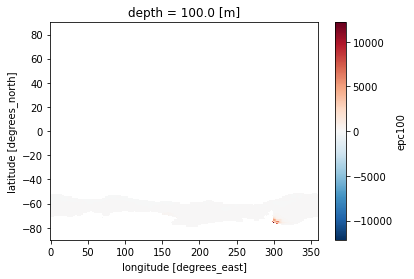

In [63]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}_percentage.nc".format(variable, model, experiment))
shade[variable].plot()
shade

In [64]:
shade["mean_inc"] = (("lat","lon"), mean_inc)

In [65]:
shade["mean_dec"] = (("lat","lon"), mean_dec)

In [66]:
shade["agree"] = (("lat","lon"), agree)

In [67]:
shade

<xarray.Dataset>
Dimensions:   (lon: 360, lat: 180)
Coordinates:
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth     float64 100.0
Data variables:
    epc100    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    mean_inc  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    mean_dec  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    agree     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 13:46:21 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

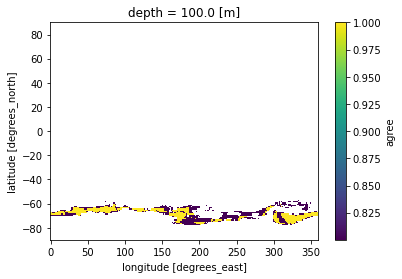

In [68]:
shade["agree"].plot()

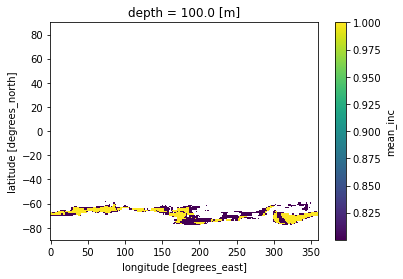

In [69]:
shade["mean_inc"].plot()

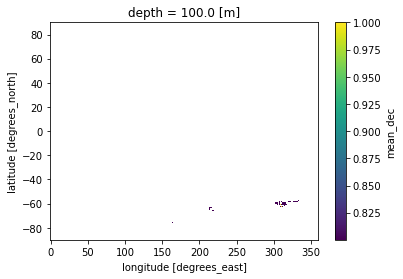

In [70]:
shade["mean_dec"].plot()

In [71]:
shade.to_netcdf(path = "Data/Shape/{}_{}_{}_agree.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Plotting

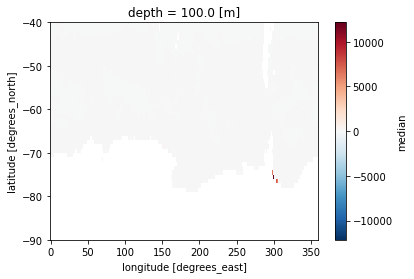

In [72]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole_median.nc".format(variable, model, experiment))
nc["median"].plot()

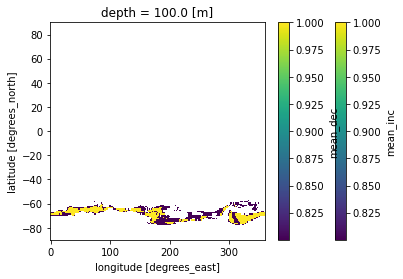

In [73]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}_agree.nc".format(variable, model, experiment))
shade["mean_inc"].plot()
shade["mean_dec"].plot()

In [74]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc["median"].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

25.4300521850586 -10.206868267059326
12159.161 -31.494501


In [75]:
files=glob.glob("Shapes/*_ice_margin_remapped_improved_more.shp")
files

['Shapes/IPSL-CM6A-LR_ice_margin_remapped_improved_more.shp',
 'Shapes/ACCESS-ESM1-5_ice_margin_remapped_improved_more.shp',
 'Shapes/EC-Earth3-CC_ice_margin_remapped_improved_more.shp',
 'Shapes/CMCC-ESM2_ice_margin_remapped_improved_more.shp',
 'Shapes/MPI-ESM1-2-HR_ice_margin_remapped_improved_more.shp']

In [76]:
lat_shade = shade['lat'].values 
lon_shade = shade['lon'].values
inc = shade["mean_inc"].values
dec = shade["mean_dec"].values
agree = shade["agree"].values


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

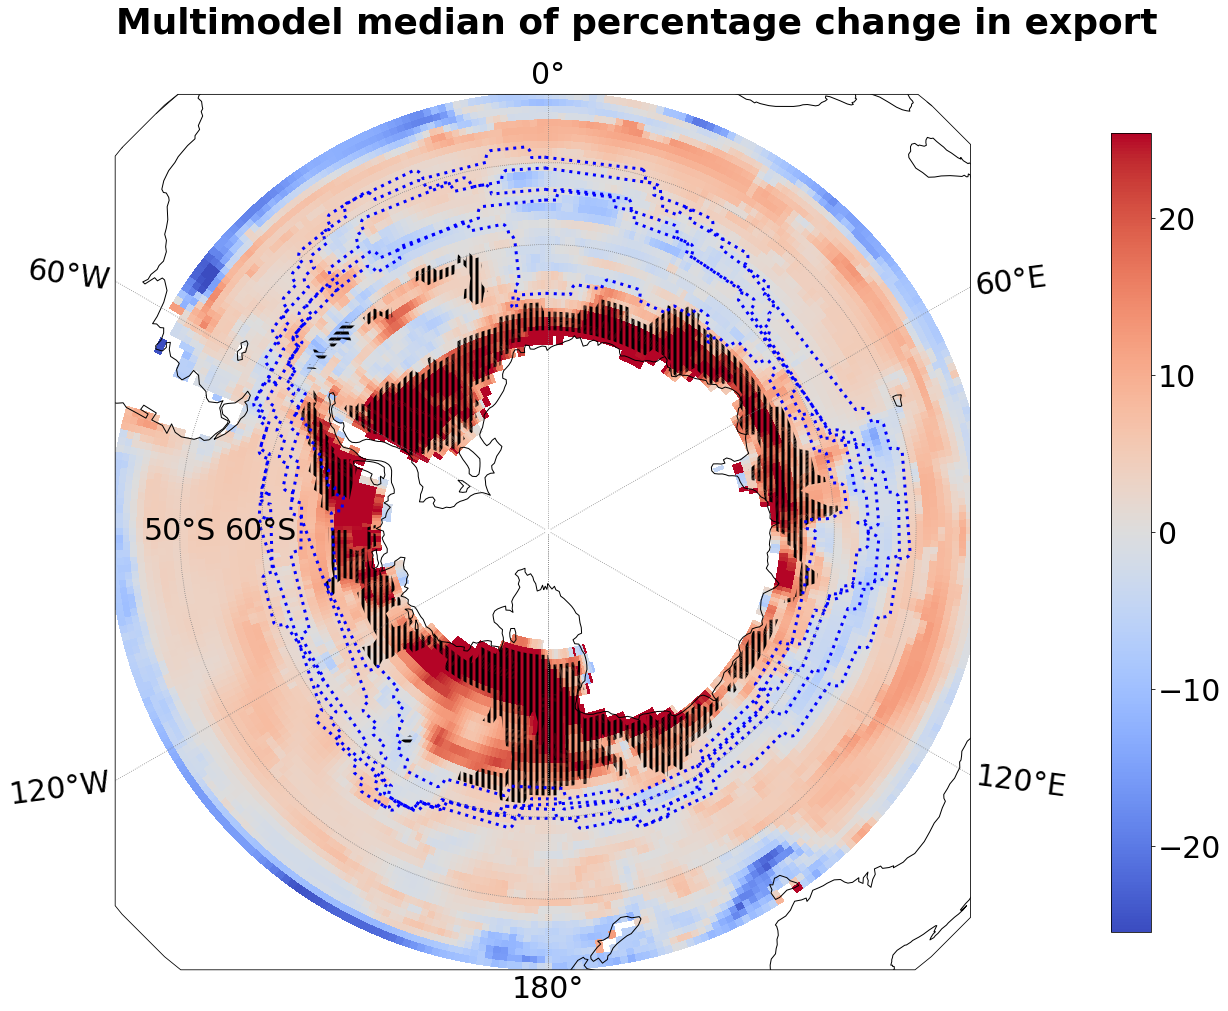

In [77]:
fig = plt.figure(figsize=[21, 21])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


#plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 30}
gl1.xlabel_style = {'size': 30}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



#ax1.title.set_text("Multimodel percentage change in epc100 by 2100")

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )

mpl.rcParams['hatch.linewidth'] = 3
density = 2
i = ax1.contourf(lon_shade, lat_shade, inc, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'|',density*'|'])
j = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'-',density*'-'])

# d = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
#     colors='none', hatches=[density*'*',density*'*'])

ax1.coastlines()

# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

for i in files:
    ice = gpd.read_file(i)
    ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'blue',
                      linestyle = ':',
                      linewidth = 3)

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)
cb.ax.tick_params(labelsize=30) 

plt.suptitle("Multimodel median of percentage change in export", fontsize = 36, fontweight = "bold", y = 0.85, x = 0.47)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

### Area calulation

In [79]:
shade = nct.open_data("Data/Shape/{}_{}_{}_agree.nc".format(variable, model, experiment))
shade.cell_area()
shade.to_nc("Data/Shape/{}_{}_{}_agree_area.nc".format(variable, model, experiment))

In [81]:
area = xarray.open_dataset("Data/Shape/{}_{}_{}_agree_area.nc".format(variable, model, experiment))
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 ...
Data variables:
    epc100     (lat, lon) float32 ...
    mean_inc   (lat, lon) float32 ...
    mean_dec   (lat, lon) float32 ...
    agree      (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 13:51:53 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [82]:
area = area.assign(inc=lambda x: x.mean_inc * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 100.0
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_inc   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_dec   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    agree      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    inc        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 13:51:53 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [83]:
area = area.assign(dec=lambda x: x.mean_dec * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth      float64 100.0
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_inc   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_dec   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    agree      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    inc        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    dec        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 13:51:53 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [86]:
inc_area = np.nansum(area["inc"].values)/1.0E+6/1e+6 
inc_area

8.641791185959628

In [87]:
dec_area = np.nansum(area["dec"].values)/1.0E+6/1e+6 
dec_area

0.26627184163460454

In [88]:
inc_area_cell = np.nansum(area["mean_inc"].values)
inc_area_cell

1919.2002

In [89]:
dec_area_cell = np.nansum(area["mean_dec"].values)
dec_area_cell

44.6

In [101]:
summary = open("output/Multimodel/{}_agreement_summary.txt".format(variable), "w")
summary.write("{} {}\n\nIncreasing area = {} cell {} million km-2\nDecreasing area = {} cells {} million km-2".format(variable, model,
                                                                                                                     inc_area_cell, inc_area,
                                                                                                                     dec_area_cell, dec_area))
summary.close()

In [ ]:
nc = nct.open_data("Data/{}_{}_{}_percentage_whole_median.nc".format(variable, model, experiment))
nc.cell_area()
nc.to_nc("Data/{}_{}_{}_percentage_whole_median_area.nc".format(variable, model, experiment))

In [93]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole_median_area.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 50)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth      float64 ...
Data variables:
    epc100     (lat, lon) float32 ...
    median     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 14:08:04 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [94]:
nc = nc.sel(lat = slice(-90, -60))

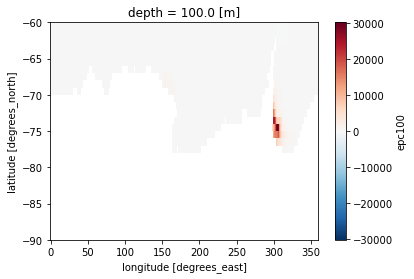

In [96]:
new = nc.where(nc[variable] != np.nan)
new[variable].plot()

<xarray.Dataset>
Dimensions:    (lat: 30, lon: 360)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -63.5 -62.5 -61.5 -60.5
    depth      float64 100.0
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan ... 36.31 32.58 28.66 24.35
    median     (lat, lon) float32 nan nan nan nan ... -2.709 -2.537 -3.222
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 6.088e+09 6.088e+09
    area       (lat, lon) float32 nan nan nan nan nan ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Aug 20 14:08:04 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

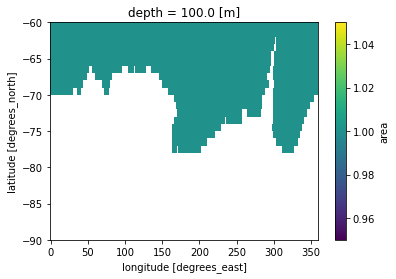

In [97]:
new1  = new.assign(area = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new1['area'].plot()
new1

In [98]:
total = np.nansum(new1["area"].values)
total

4204.0

In [99]:
inc_percentage = (inc_area_cell/total)*100
inc_percentage

45.651763677597046

In [100]:
dec_percentage = (dec_area_cell/total)*100
dec_percentage

1.0608943179249763